
<span style="color:#00000; font-family: 'Bebas Neue'; font-size: 2.25em;">**Finding Descriptive Statistics in American Brewery and Beer Data**</span>

<span style="color:#00000;; font-family: 'Bebas Neue'; font-size: 1.25em;">**by: Pritpal Banghu, Sean Bernard, Andre Loukrezis & Bridget Weill**</span>






<img src =  'https://cdn.pixabay.com/photo/2016/07/13/01/01/beer-1513436_960_720.jpg' width="800" height="800" />

##### *Source: Pixabay*

# Project Objective


In this project, we looked at United States brewery and beer data to determine multiple descriptive statistics such as which states have the most breweries, which breweries produce the beers with the highest ABV, etc.


### Questions to Answer

- Which state has the highest number of breweries? 
- Which city has the highest number of breweries? 
- Which breweries serve the beers with the highest alcohol content?


- Which is the most popular beer style in US? 
- What is the average alcohol content by brand?
- What is the average alcohol content by beer type?
- What is the average alcohol content by state?

- What is the most popular beer in Connecticut?
- What is the average alcohol content of beers in Connecticut?
- How many breweries are there in Connecticut?


### Data Source

The data used in this project comes from the following: 

- Brewery and Beer Types Data - https://www.kaggle.com/nickhould/craft-cans
- Census Region Classifications Data - 




### Glossary

**ABV:** 

*Alcohol by volume*, a standard measure of how much alcohol (ethanol) is contained in a given volume of an alcoholic beverage (expressed as a volume percent).It is defined as the number of millilitres (mL) of pure ethanol present in 100 mL (3.4 fl. oz) of solution at 20 °C (68 °F). The number of millilitres of pure ethanol is the mass of the ethanol divided by its density at 20 °C, which is 0.78924 g/mL (105.3 fl oz/gallon). (Wikipedia)

**Pandas:** 

**Numpy:** 

**Matplotlib:**

Python’s fundamental plotting library (pg. 50 Pandas Textbook)

**Seaborn:**  

a library that builds on matplotlib by providing a higher-level interface for statistical graphics. It provides an interface to produce prettier and more complex visualizations with fewer lines of code.

The seaborn library is tightly integrated with Pandas and the rest of the PyData stack (numpy, scipy, statsmodels), making visualizations from any part of the data analysis process a breeze. Since seaborn is built on top of matplotlib, the user still has the ability to fine-tune the visualizations. (pg. 61 Pandas Textbook)


### Data Dictionary

### Import Data

In [39]:

# Import all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns

from numpy import median

# Upload csv files into dataframes.

beers_df = pd.read_csv('beers.csv') 
breweries_df = pd.read_csv('breweries.csv') 


print(beers_df, breweries_df)

      Unnamed: 0    abv   ibu    id                  name  \
0              0  0.050   NaN  1436              Pub Beer   
1              1  0.066   NaN  2265           Devil's Cup   
2              2  0.071   NaN  2264   Rise of the Phoenix   
3              3  0.090   NaN  2263              Sinister   
4              4  0.075   NaN  2262         Sex and Candy   
...          ...    ...   ...   ...                   ...   
2405        2405  0.067  45.0   928             Belgorado   
2406        2406  0.052   NaN   807         Rail Yard Ale   
2407        2407  0.055   NaN   620       B3K Black Lager   
2408        2408  0.055  40.0   145   Silverback Pale Ale   
2409        2409  0.052   NaN    84  Rail Yard Ale (2009)   

                               style  brewery_id  ounces  
0                American Pale Lager         408    12.0  
1            American Pale Ale (APA)         177    12.0  
2                       American IPA         177    12.0  
3     American Double / Imperia

### **Data Check**

##### Before proceding with finding any insights from the data sets, we must first look at the integrity of the data, see if there are any null values, and if so remove or replace them within the dataframe.

In [40]:
# We first use .isna().any to check if there are any null values in the data set.

beers_df.isna().any()

# We have found that the "abv", "ibu" and 'style' categories all have True values, meaning that they have null data
# in their columns.

Unnamed: 0    False
abv            True
ibu            True
id            False
name          False
style          True
brewery_id    False
ounces        False
dtype: bool

In [41]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset.
breweries_df.isna().any()

ID       False
name     False
city     False
state    False
dtype: bool

In [42]:
# As we can see, there are 1,005 values missing from the "ibu" category, 62 values missing from the "abv" category
# and 5 values missing from the "style" category. 
beers_df.isna().sum()

Unnamed: 0       0
abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [43]:
# We can see that roughly 42% of the data points in the 'ibu' category are missing.
# Because of this, and because this does not contribute any significant insight into
# our analysis of beer types at the varying breweries, we will drop this category once
# finish doing our initial data integrity check. 

(beers_df.isna().sum()/beers_df.shape[0]).round(4) * 100

Unnamed: 0     0.00
abv            2.57
ibu           41.70
id             0.00
name           0.00
style          0.21
brewery_id     0.00
ounces         0.00
dtype: float64

In [44]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset.
breweries_df.isna().sum()

ID       0
name     0
city     0
state    0
dtype: int64

In [45]:
# After checking for any missing value, we can see that there are no missing values in the breweries dataset
# and there will be no % missing values unlike in the beers.csv dataset.

(breweries_df.isna().sum()/breweries_df.shape[0]).round(4) * 100

ID       0.0
name     0.0
city     0.0
state    0.0
dtype: float64

In [46]:
beers_df.dtypes

Unnamed: 0      int64
abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [47]:
breweries_df.dtypes

ID        int64
name     object
city     object
state    object
dtype: object

In [48]:
tips_data['sex'] = tips_data['sex'].astype(str)
tips_data.dtypes

NameError: name 'tips_data' is not defined

(array([   0,    1,    2, ..., 2302, 2303, 2304]),
 <a list of 2305 Text xticklabel objects>)

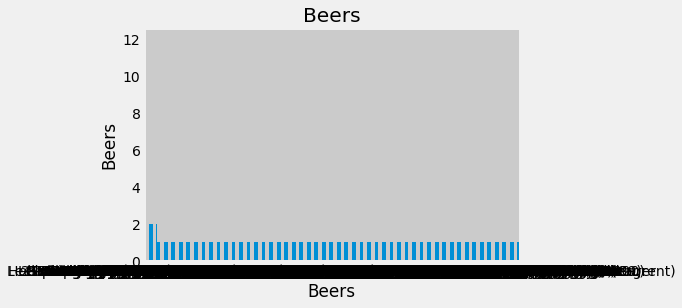

In [49]:
beers_df['name'].value_counts().plot(kind='bar')
plt.title('Beers')
plt.ylabel('Beers')
plt.xlabel('Beers')
plt.xticks(rotation='horizontal')

In [50]:
states_breweries=breweries_df.groupby(['state']).count()
states_breweries.head()

,ID,name,city
state,,,
AK,7,7,7
AL,3,3,3
AR,2,2,2
AZ,11,11,11
CA,39,39,39


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

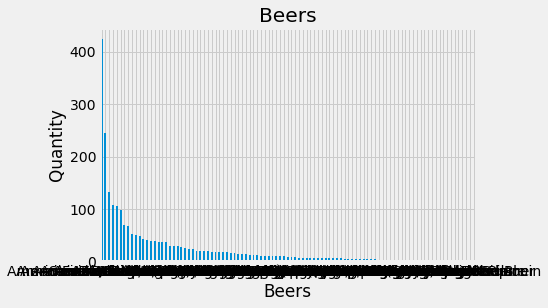

In [51]:
beers_df['style'].value_counts().plot(kind='bar')
plt.title('Beers')
plt.ylabel('Quantity')
plt.xlabel('Beers')
plt.xticks(rotation='horizontal')

In [52]:
beers_styles = beers_df.groupby(['style']).count()
beers_styles.head(10)


,Unnamed: 0,abv,ibu,id,name,brewery_id,ounces
style,,,,,,,
Abbey Single Ale,2,2,2,2,2,2,2
Altbier,13,13,8,13,13,13,13
American Adjunct Lager,18,18,11,18,18,18,18
American Amber / Red Ale,133,125,77,133,133,133,133
American Amber / Red Lager,29,28,16,29,29,29,29
American Barleywine,3,3,2,3,3,3,3
American Black Ale,36,35,20,36,36,36,36
American Blonde Ale,108,104,61,108,108,108,108
American Brown Ale,70,68,38,70,70,70,70


In [53]:
beers_styles = beers_df.groupby(['style'])[['abv']].count()
beers_styles.head(10)

,abv
style,
Abbey Single Ale,2
Altbier,13
American Adjunct Lager,18
American Amber / Red Ale,125
American Amber / Red Lager,28
American Barleywine,3
American Black Ale,35
American Blonde Ale,104
American Brown Ale,68


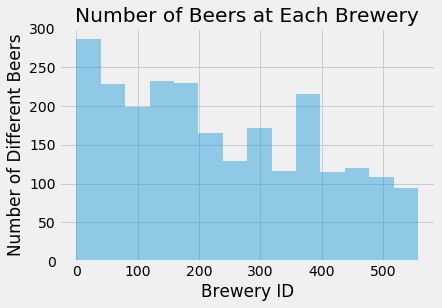

In [54]:
hist, ax = plt.subplots()
ax = sns.distplot(beers_df['brewery_id'], kde=False)
ax.set_title('Number of Beers at Each Brewery')
ax.set_xlabel('Brewery ID')
ax.set_ylabel('Number of Different Beers')
plt.show()

KeyError: 'brewery_id'

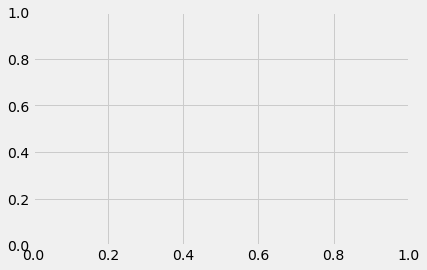

In [55]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(breweries_df['brewery_id'], breweries_df['abv'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

In [ ]:
beers_df.groupby('brewery_id')['style'].nunique()

In [ ]:
breweries_df.groupby('state')['city'].nunique()

In [ ]:
breweries_df.groupby(['state']).size().plot.bar()

In [ ]:

beers_df.groupby('style')['abv'].nunique().head(15)

In [ ]:
source_data.groupby('Sex')['Survived'].value_counts().plot(kind='bar')

In [ ]:
beers_df.groupby('name')['style'].nunique()

In [ ]:
beers_df.groupby('city')['state'].nunique()

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Census_Regions_and_Division_of_the_United_States.svg/1024px-Census_Regions_and_Division_of_the_United_States.svg.png' width="600" height="200" />

##### *Source: Wikipedia*





**Next Steps:**
1. Upload classifications for states into divisions and regions.
2. Append the classifications of each state into df_breweries dataframe.
3. Run the same descriptive statistics that were previously ran by state, but now for the divisions and regions.
4. Create visualizations with results and provide comments.